In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
#!ls /home/aistudio/data

In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
#!ls /home/aistudio/work

## 前期工作

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_data = pd.read_csv('./train_local.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
1,2,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
2,3,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
3,4,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
4,5,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


### 训练集特征说明
- PassengerID (ID)
- Survived (是否存活)
- Pclass (客舱等级，重要)
- Name (姓名，可结合爬虫)
- Sex (性别，重要)
- Age (年龄，重要)
- SibSp (旁系亲友)
- Parch (直系亲属)
- Ticket (票编号)
- Fare (票价)
- Cabin (客舱编号)
- Embarked (上船港口编号)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          499 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        139 non-null    object 
 11  Embarked     620 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.5+ KB


可以看到 Age 和 Cabin 和 Embarked都存在空值

In [6]:
test_data = pd.read_csv('./test_local.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,624,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,625,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,626,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,627,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,628,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Pclass       268 non-null    int64  
 2   Name         268 non-null    object 
 3   Sex          268 non-null    object 
 4   Age          215 non-null    float64
 5   SibSp        268 non-null    int64  
 6   Parch        268 non-null    int64  
 7   Ticket       268 non-null    object 
 8   Fare         268 non-null    float64
 9   Cabin        65 non-null     object 
 10  Embarked     267 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 23.2+ KB


In [8]:
all_data = pd.concat([train_data,test_data],ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     623 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     887 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


## 数据初步分析

In [9]:
train_data['Survived'].value_counts()

0    392
1    231
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

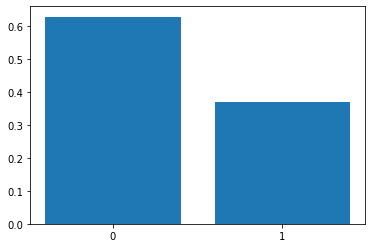

In [10]:
cdt=train_data['Survived'].value_counts()
plt.bar(x=('0','1'),height=cdt/sum(cdt))

0.家庭大小与存活率的关系

In [60]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
 
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.708333
2,3,0.557143
1,2,0.513514
6,7,0.375000
0,1,0.298387
5,6,0.176471
4,5,0.125000
7,8,0.000000
8,11,0.000000


In [65]:
for dataset in combine:
    dataset['Family'] = 1
    dataset.loc[dataset['FamilySize'] ==1 , 'Family'] = 0
    dataset.loc[dataset['FamilySize'] >=5 , 'Family'] = -1

train_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,-1,0.152174
1,0,0.298387
2,1,0.551220


1. 性别与存活率的关系

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

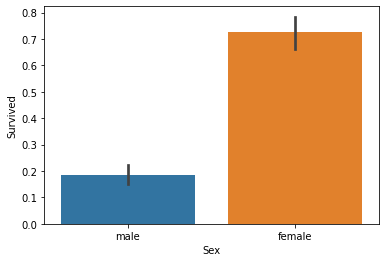

In [11]:
sns.barplot(x = 'Sex' , y = 'Survived',data = train_data)

2.客舱等级和存活率关系

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

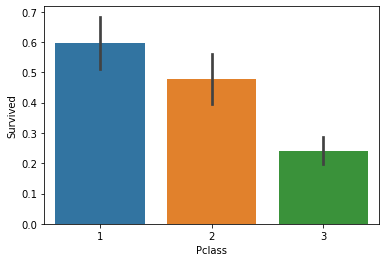

In [12]:
sns.barplot(x = 'Pclass' , y = 'Survived' , data = train_data)

3. 旁系亲属数量和存活率的关系

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

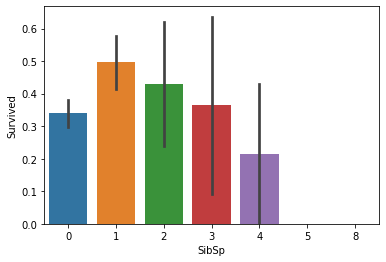

In [13]:
sns.barplot(x = 'SibSp' , y = 'Survived' , data = train_data)

4.直系亲属数量和存活率的关系

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

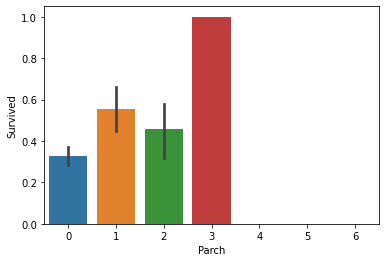

In [14]:
sns.barplot(x = 'Parch' , y = 'Survived' , data = train_data)

5.从不同的生还情况的密度图看，15岁附近的生还率有明显区别

Text(12.389771412037035, 0.5, 'density')

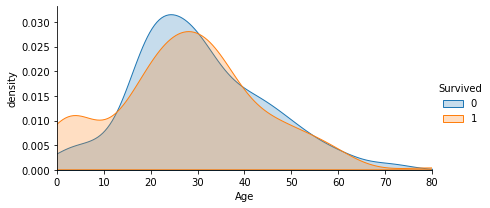

In [15]:
facet = sns.FacetGrid(train_data , hue = 'Survived' , aspect= 2 )
facet.map(sns.kdeplot , 'Age',shade = True)
#kdeplot核密度估计
facet.set(xlim = (0,train_data['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')


6.上船港口和存活率的关系

<AxesSubplot:xlabel='Embarked', ylabel='count'>

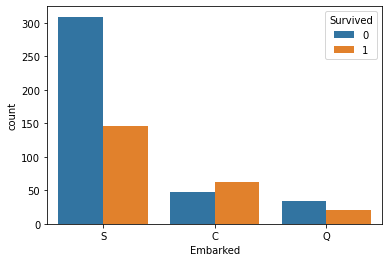

In [16]:
sns.countplot(x='Embarked' , hue = 'Survived' , data = train_data)

7.不同称呼的乘客幸存率不同(把name中的称呼都提取出来，并且对同个人具有多个称呼标签进行统一）

In [17]:
train_data['Name']

0             Dodge, Master. Washington
1                     Mitkoff, Mr. Mito
2          Johnson, Miss. Eleanor Ileen
3                 West, Mr. Edwy Arthur
4                    Hart, Mr. Benjamin
                     ...               
618    Salkjelsvik, Miss. Anna Kristine
619               Cairns, Mr. Alexander
620             Hansen, Mr. Claus Peter
621           Carter, Miss. Lucile Polk
622           White, Mr. Richard Frasar
Name: Name, Length: 623, dtype: object

In [18]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [19]:
all_data['Title'].head()

0    Master
1        Mr
2      Miss
3        Mr
4        Mr
Name: Title, dtype: object

In [20]:
all_data['Title']

0      Master
1          Mr
2        Miss
3          Mr
4          Mr
        ...  
886        Mr
887        Mr
888        Mr
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object

<AxesSubplot:xlabel='Title', ylabel='Survived'>

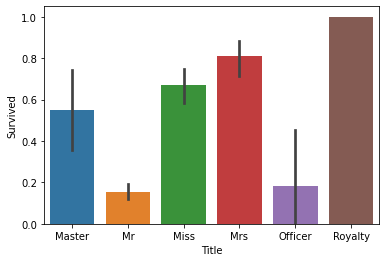

In [21]:
Title_dict = {}
Title_dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
Title_dict.update(dict.fromkeys(['Don','Str','the Countess','Dona','Lady'],'Royalty'))
Title_dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_dict.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
Title_dict.update(dict.fromkeys(['Mr'],'Mr'))
Title_dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

all_data['Title'] = all_data['Title'].map(Title_dict)
sns.barplot(x = 'Title',  y = 'Survived', data = all_data)

8.亲属数量和存活率的关系

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

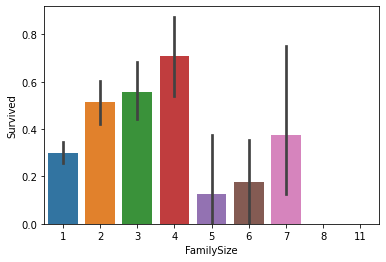

In [22]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x = 'FamilySize' , y = 'Survived' , data = all_data)

<AxesSubplot:xlabel='FamilyLabel', ylabel='Survived'>

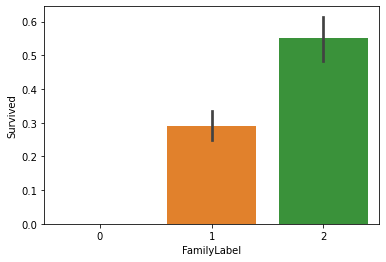

In [23]:
def Fam_label(s):
    if ( s>= 2) and (s <= 4):
        return 2
    elif ((s>4) and (s<=7))or (s == 1):
        return 1
    elif s > 7:
        return 0
all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x = 'FamilyLabel' , y = 'Survived' , data = all_data)

9.不同客舱的乘客幸存率不同
（新增Deck特征，先把Cabin空缺值填充为Unknown，再提取Cabin中的首字母构成乘客的甲板号）

<AxesSubplot:xlabel='Desk', ylabel='Survived'>

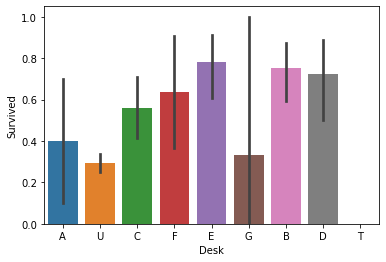

In [24]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Desk'] = all_data['Cabin'].str.get(0)
sns.barplot(x = 'Desk' , y = 'Survived' , data = all_data)

10.共票数与生存率的关系（统计每个乘客的共票数）

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

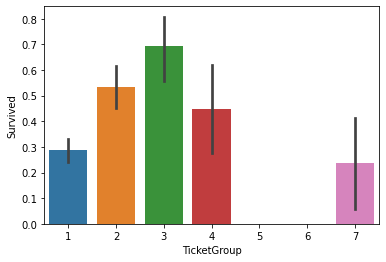

In [25]:
Ticket_count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_count[x])
sns.barplot(x = 'TicketGroup', y = 'Survived' , data = all_data)

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

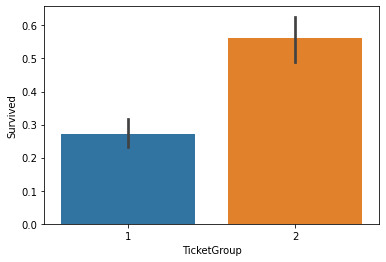

In [26]:
def Ticket_depart(s):
    if (s >= 2) and (s <= 4):
        return 2
    elif ((s>4) and (s<=8)) or (s == 1):
        return 1
    elif s > 8:
        return 0
all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_depart)
sns.barplot(x = 'TicketGroup' , y = 'Survived' , data = all_data)

## 数据清洗

1. 缺失值清洗         
Age缺失值为263，用Sex,Title,Pclass三个特征构建随机森林模型，填充年龄缺失值

In [27]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age','Pclass','Sex','Title']]
age_df = pd.get_dummies(age_df)
#只会将分类变量变成虚拟变量，不会将连续的数值变量变成虚拟变量
age_df=age_df.sort_values(by='Age',ascending=True)
age_df

,Age,Pclass,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
443,0.42,3,0,1,1,0,0,0,0,0
461,0.67,2,0,1,1,0,0,0,0,0
123,0.75,3,1,0,0,1,0,0,0,0
313,0.75,3,1,0,0,1,0,0,0,0
746,0.83,2,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
857,NaN,3,0,1,0,0,1,0,0,0
865,NaN,3,0,1,0,0,1,0,0,0
869,NaN,3,0,1,0,0,1,0,0,0
875,NaN,3,0,1,0,0,1,0,0,0


In [28]:
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
known_age

array([[ 0.42,  3.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.67,  2.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75,  3.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [71.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [74.  ,  3.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [80.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [29]:
y = known_age[:,0]
X = known_age[:,1:]
rfr = RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
rfr.fit(X,y)
predictedAge = rfr.predict(unknown_age[:,1::])
all_data.loc[(all_data.Age.isnull()) ,'Age'] = predictedAge

In [30]:
predictedAge

array([28.72484841, 32.69399879, 40.43205965, 16.13049849, 28.72484841,
       33.23346257, 28.72484841, 41.55565355, 32.69399879, 41.55565355,
       16.13049849, 28.72484841, 28.72484841, 28.72484841, 28.72484841,
       28.72484841,  5.2608116 , 16.13049849, 28.72484841, 28.72484841,
       33.23346257, 28.72484841, 16.13049849, 28.72484841, 28.72484841,
       40.43205965, 28.72484841, 16.13049849, 28.72484841, 28.72484841,
       28.72484841, 51.27636564, 41.55565355, 28.72484841, 32.69399879,
       28.72484841, 41.55565355, 28.72484841, 28.72484841, 28.72484841,
       16.13049849, 28.72484841, 28.72484841, 28.72484841, 28.72484841,
       28.72484841, 28.72484841, 28.72484841, 33.23346257, 16.13049849,
       41.55565355, 41.55565355, 41.55565355, 28.72484841, 28.72484841,
       32.69399879, 16.13049849, 28.72484841, 22.12861933, 28.72484841,
       28.72484841, 28.72484841, 28.72484841, 28.72484841, 28.72484841,
       28.72484841, 16.13049849, 28.72484841, 28.72484841, 28.72

embarked 也有2个缺失值，根据这个个体的其他信息，直接填充

In [31]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Desk,TicketGroup
32,33,1.0,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,Unknown,NaN,Mrs,3,2,U,2
55,56,0.0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.800,Unknown,NaN,Mr,1,1,U,1
68,69,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.000,B28,NaN,Miss,1,1,B,2
859,860,NaN,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.000,B28,NaN,Mrs,1,1,B,2


In [32]:
all_data.groupby(by=['Pclass','Embarked']).Fare.median()  #用fare的中位数

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [33]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

fare 的缺失值，用中位数填充

In [34]:
all_data[all_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Desk,TicketGroup


In [35]:
fare = all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

2.异常值处理         
- 多人家庭中没有获救的女性和儿童为异常值

In [36]:
all_data['Surname'] = all_data['Name'].apply(lambda x : x.split(',')[0].strip()) 

In [37]:
Surname_count = dict(all_data['Surname'].value_counts())
all_data['Family_count'] = all_data['Surname'].apply(lambda x : Surname_count[x])

In [38]:
#找出所有处于多人家庭的儿童和妇女和成年男性
Female_Child_Count = all_data.loc[(all_data['Family_count'] >= 2) & ((all_data['Age'] <= 12) | (all_data['Sex'] == 'female'))]
Male_Adult_Count = all_data.loc[(all_data['Family_count'] >= 2) & (all_data['Age'] > 12) & (all_data['Sex'] == 'male')]

In [39]:
Female_Child_Count

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Desk,TicketGroup,Surname,Family_count
2,3,1.0,3,"Johnson, Miss. Eleanor Ileen",female,1.00000,1,1,347742,11.1333,Unknown,S,Miss,3,2,U,2,Johnson,6
6,7,1.0,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00000,1,1,C.A. 31921,26.2500,Unknown,S,Mrs,3,2,U,2,Collyer,3
10,11,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.00000,1,1,17421,110.8833,C68,C,Mrs,3,2,C,2,Thayer,3
14,15,1.0,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,40.43206,1,0,PC 17611,133.6500,Unknown,S,Mrs,2,2,U,2,Frauenthal,2
17,18,0.0,3,"Panula, Master. Eino Viljami",male,1.00000,4,1,3101295,39.6875,Unknown,S,Master,6,1,U,1,Panula,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,NaN,1,"Allison, Master. Hudson Trevor",male,0.92000,1,2,113781,151.5500,C22 C26,S,Master,4,2,C,2,Allison,3
851,852,NaN,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.00000,1,0,244367,26.0000,Unknown,S,Mrs,2,2,U,2,Kantor,2
854,855,NaN,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,5,1,B,2,Ryerson,2
866,867,NaN,3,"Oreskovic, Miss. Marija",female,20.00000,0,0,315096,8.6625,Unknown,S,Miss,1,1,U,1,Oreskovic,2


In [40]:
Female_Child = pd.DataFrame(Female_Child_Count.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns = ['GroupCount']
Female_Child

,GroupCount
1.000000,64
0.000000,22
0.666667,1
0.250000,1


Text(0.5, 0, 'AverageSurvived')

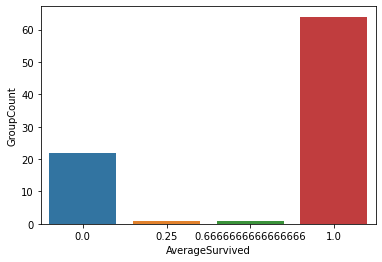

In [41]:
sns.barplot(x = Female_Child.index , y = Female_Child['GroupCount'] , data = all_data).set_xlabel('AverageSurvived')

In [42]:
Male_Adult = pd.DataFrame(Male_Adult_Count.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns = ['GroupCount']
Male_Adult

,GroupCount
0.000000,67
1.000000,11
0.500000,4
0.333333,2


普遍规律是女性和儿童的幸存率较高， 成年男性的幸存率较低，所以把不符合普遍规律的反常组选出来单独处理。          
把女性和儿童组里幸存率为0的组设置为遇难组，成年男性组里存活率为1的组设为幸存组，推测处于遇难组的女性和儿童幸存的可能性可能较低，处于幸存组的成年男性幸存的可能性较高。

In [43]:
Female_Child_Count = Female_Child_Count.groupby('Surname')['Survived'].mean()
Dead_List = set(Female_Child_Count[Female_Child_Count.apply(lambda x : x==0)].index)
Dead_List

{'Allison',
 'Attalah',
 'Barbara',
 'Boulos',
 'Bourke',
 'Danbom',
 'Ford',
 'Goodwin',
 'Johnston',
 'Jussila',
 'Lefebre',
 'Lobb',
 'Palsson',
 'Panula',
 'Rice',
 'Sage',
 'Skoog',
 'Strom',
 'Turpin',
 'Van Impe',
 'Vander Planke',
 'Zabour'}

In [44]:
Male_Adult_Count = Male_Adult_Count.groupby('Surname')['Survived'].mean()
Survived_List = set(Male_Adult_Count[Male_Adult_Count.apply(lambda x : x== 1)].index)
Survived_List

{'Beane',
 'Beckwith',
 'Bishop',
 'Chambers',
 'Daly',
 'Dick',
 'Goldenberg',
 'Hoyt',
 'Jussila',
 'McCoy',
 'Nakid'}

将测试集中的异常值改为正常值

In [45]:
#将测试集中所有幸存组的成员改成女性和儿童，将遇难组的都改成男性
train = all_data.loc[all_data['Survived'].notnull()]
test = all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x : x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x : x in Survived_List)),'Title'] = 'Miss'





D:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## 特征转换

In [46]:
all_data = pd.concat([train,test])
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Desk','TicketGroup']]
all_data = pd.get_dummies(all_data)
train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()].drop('Survived',axis = 1)
X = train.values[:,1:]
y = train.values[:,0]


In [47]:
all_data['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Survived, Length: 891, dtype: bool

In [48]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
1,2,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
2,3,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
3,4,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
4,5,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.feature_selection import SelectKBest
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [50]:
pipe = Pipeline([('select', SelectKBest(k=20)),
            ('classify',RandomForestClassifier(random_state=10,max_features='sqrt'))
            ])
parm_test = {'classify__n_estimators':list(range(20,50,2)),
            'classify__max_depth':list(range(3,60,3))
            }

gsearch = GridSearchCV(estimator=pipe,param_grid=parm_test,scoring='roc_auc',cv = 10)
gsearch.fit(X,y)
print(gsearch.best_params_,gsearch.best_score_)

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeW

{'classify__max_depth': 12, 'classify__n_estimators': 28} 0.8657069862504645


D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [51]:
from sklearn.pipeline import make_pipeline
select = SelectKBest( k = 20)
clf = RandomForestClassifier(random_state=10,warm_start=True,
                            n_estimators = 26,
                            max_depth = 6,
                            max_features = 'sqrt'
                            )
pipeline = make_pipeline(select,clf)
pipeline.fit(X,y)

Pipeline(steps=[('selectkbest', SelectKBest(k=20)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, max_features='sqrt',
                                        n_estimators=26, random_state=10,
                                        warm_start=True))])

In [52]:
from sklearn import model_selection,metrics
cv_score = model_selection.cross_val_score(pipeline,X,y,cv = 10)
print('CV score: Mean-%.7g | Std -%.7g' % (np.mean(cv_score),np.std(cv_score)))

CV score: Mean-0.8314132 | Std -0.06219589


D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [53]:
predictions = pipeline.predict(test)
submission = pd.DataFrame({'PassengerID' : test.index+1 , 'Survived': predictions.astype(np.int32)})
submission.to_csv('submission.csv',index = False)

In [54]:
test.head()

,Pclass,Age,Fare,FamilyLabel,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Desk_A,Desk_B,Desk_C,Desk_D,Desk_E,Desk_F,Desk_G,Desk_T,Desk_U
623,3,5.260812,15.2458,2,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
624,2,31.000000,10.5000,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
625,3,20.000000,7.9250,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
626,2,6.000000,33.0000,2,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
627,3,14.000000,11.2417,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
#mport pickle
#s=pickle.dumps(pipeline)
import joblib
joblib.dump(pipeline, 'pipeline.pkl')

#clf3 = joblib.load('pipline.pkl')
#print(clf3.predict(X[0:1]))  # 输出[0]


['pipeline.pkl']